# 📑 &nbsp; Deep Learning. Cultivar Recognition
<a href="https://olgabelitskaya.github.io/README.html">&#x1F300; &nbsp; 
Home Page &nbsp;</a> &nbsp; &nbsp; &nbsp;
<a href="https://www.instagram.com/olga.belitskaya/">&#x1F300; &nbsp;
Instagram Posts &nbsp;</a> &nbsp; &nbsp; &nbsp;
<a href="https://www.pinterest.ru/olga_belitskaya/code-style/">&#x1F300; &nbsp; Pinterest Posts</a><br/>
For this project, I have created the dataset of <br/>
776 color images (160x160x3) with tomato cultivars.<br/>
## ✒️ &nbsp; Importing Libraries and Defining Helpful Functions

In [1]:
!pip install --upgrade neural_structured_learning --user

Requirement already up-to-date: neural_structured_learning in /root/.local/lib/python3.6/site-packages (1.3.0)


In [2]:
spath='/usr/local/lib/python3.6/dist-packages'
import sys; sys.path.append(spath)
import warnings; warnings.filterwarnings('ignore')
import h5py,urllib,zipfile,tensorflow as tf
import pandas as pd,numpy as np,pylab as pl
import tensorflow_hub as th
import neural_structured_learning as nsl

 ## ✒️ &nbsp; Data Loading and Preprocessing

In [3]:
fpath='https://olgabelitskaya.github.io/'
zf='TomatoCultivarImages.h5.zip'
input_file=urllib.request.urlopen(fpath+zf)
output_file=open(zf,'wb')
output_file.write(input_file.read())
output_file.close(); input_file.close()
zipf=zipfile.ZipFile(zf,'r')
zipf.extractall(''); zipf.close()
f=h5py.File(zf[:-4],'r')
keys=list(f.keys()); print(keys)

['test_images', 'test_labels', 'train_images', 'train_labels']


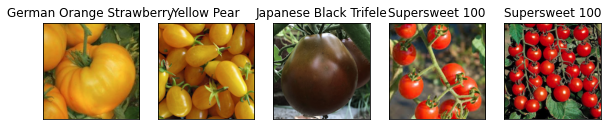

In [4]:
names=['Kumato','Beefsteak','Tigerella',
       'Roma','Japanese Black Trifele',
       'Yellow Pear','Sun Gold','Green Zebra',
       'Cherokee Purple','Oxheart','Blue Berries',
       'San Marzano','Banana Legs',
       'German Orange Strawberry','Supersweet 100']
n_classes=len(names)
x_test=np.array(f[keys[0]])
y_test=np.array(f[keys[1]],dtype=np.float32)
x_train=np.array(f[keys[2]])
y_train=np.array(f[keys[3]],dtype=np.float32)
fig=pl.figure(figsize=(10,4))
n=np.random.randint(1,50)
for i in range(n,n+5):
    ax=fig.add_subplot(1,5,i-n+1,\
    xticks=[],yticks=[],
    title=names[int(y_test[i])])
    ax.imshow((x_test[i]))

In [5]:
n=int(len(x_test)/2)
x_valid,y_valid=x_test[:n],y_test[:n]
x_test,y_test=x_test[n:],y_test[n:]
df=pd.DataFrame([[x_train.shape,x_valid.shape,x_test.shape],
                 [x_train.dtype,x_valid.dtype,x_test.dtype],
                 [y_train.shape,y_valid.shape,y_test.shape],
                 [y_train.dtype,y_valid.dtype,y_test.dtype]],
                 columns=['train','valid','test'],
                 index=["images' shape",'image type',
                        "labels' shape",'label type'])
df

,train,valid,test
images' shape,"(621, 160, 160, 3)","(77, 160, 160, 3)","(78, 160, 160, 3)"
image type,float32,float32,float32
labels' shape,"(621,)","(77,)","(78,)"
label type,float32,float32,float32


## ✒️ &nbsp; Classification Models
CNN Based Models with Adversarial Regularization



In [6]:
batch_size=64; img_size=x_train.shape[1]; epochs=30
base_model=tf.keras.Sequential([
    tf.keras.Input((img_size,img_size,3),name='input'),
    tf.keras.layers.Conv2D(32,(5,5),padding='same'),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Conv2D(196,(5,5)),
    tf.keras.layers.Activation('relu'),    
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.GlobalMaxPooling2D(),    
    tf.keras.layers.Dense(512),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(n_classes,activation='softmax')
])
adv_config=nsl.configs\
.make_adv_reg_config(multiplier=.2,adv_step_size=.05)
adv_model=nsl.keras\
.AdversarialRegularization(base_model,adv_config=adv_config)
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [7]:
train=tf.data.Dataset.from_tensor_slices(
    {'input':x_train,'label':y_train})\
     .batch(batch_size)
valid=tf.data.Dataset.from_tensor_slices(
    {'input':x_valid,'label':y_valid})\
     .batch(batch_size)
valid_steps=x_valid.shape[0]//batch_size
adv_model.fit(train,validation_data=valid,verbose=2,
              validation_steps=valid_steps,epochs=epochs)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f0b7d8accc8> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f0b7d8accc8> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: <cyfunction Socket.send at 0x7f0b7d8accc8> is not a module, class, method, function, traceback, frame, or code object
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
10/10 - 5s - loss: 3.2557 - sparse_categorical_crossentropy: 2.7120 - sparse_categorical_accuracy: 0.1047 - scaled_adversarial_loss: 0.5437 - val_loss: 3.2258 - val_sparse_categorical_crossentropy: 2.6878 - val_sparse_categorical_accuracy: 0.1406 - val_scaled_adversarial_loss: 0.5380
Epoch 2/30
10/10 - 4s - loss: 3.1277 - sparse_categorical_crossentropy: 2.6065 - sparse_categorical_accuracy: 0.1449 - scaled_adversarial_loss: 0.5212 - val_loss: 3.0590 - val_sparse_categorical_crossentropy: 2.5484 - val_sparse_categorical_accuracy: 0.2656 - val_scaled_adversarial_loss: 0.5106
Epoch 3/30
10/10 - 4s - loss: 2.8106 - sparse_categorical_crossentropy: 2.3451 - sparse_categorical_accuracy: 0.1804 - scaled_adversarial_loss: 0.4655 - val_loss: 2.7535 - val_sparse_categorical_crossentropy: 2.2930 - val_sparse_categorical_accuracy: 0.2500 - val_scaled_adversar

In [8]:
adv_model.evaluate({'input':x_test,'label':y_test})

3/3 [==============================] - 1s 167ms/step - loss: 1.6841 - sparse_categorical_crossentropy: 1.3965 - sparse_categorical_accuracy: 0.5513 - scaled_adversarial_loss: 0.2876


[1.684090495109558, 1.3965349197387695, 0.5512820482254028, 0.2875554859638214]

TFHub Models

In [9]:
#y_train,y_valid,y_test=\
#np.array(y_train,dtype='int32'),\
#np.array(y_valid,dtype='int32'),\
#np.array(y_test,dtype='int32')

In [17]:
def premodel(pix,den,mh,lbl):
    model=tf.keras.Sequential([
        tf.keras.layers.Input((pix,pix,3),
                              name='input'),
        th.KerasLayer(mh,trainable=True),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(den,activation='relu'),
        tf.keras.layers.Dropout(rate=.5),
        tf.keras.layers.Dense(lbl,activation='softmax')])
    model.compile(optimizer='adam',metrics=['accuracy'],
                  loss='sparse_categorical_crossentropy')
    display(model.summary())
    return model
def cb(fw):
    early_stopping=tf.keras.callbacks\
    .EarlyStopping(monitor='val_loss',patience=20,verbose=2)
    checkpointer=tf.keras.callbacks\
    .ModelCheckpoint(filepath=fw,save_best_only=True,verbose=2)
    lr_reduction=tf.keras.callbacks\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

In [18]:
[handle_base,pixels]=["mobilenet_v2_075_160",160]
mhandle="https://tfhub.dev/google/imagenet/{}/feature_vector/4"\
.format(handle_base)
fw='weights.best.hdf5'

In [19]:
model=premodel(pixels,1024,mhandle,n_classes)
history=model.fit(x=x_train,y=y_train,batch_size=32,
                  epochs=70,callbacks=cb(fw),
                  validation_data=(x_valid,y_valid))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              1382064   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              1311744   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 15)                15375     
Total params: 2,709,183
Trainable params: 2,682,543
Non-trainable params: 26,640
_________________________________________________________________


None

Epoch 1/70
20/20 [==============================] - ETA: 0s - loss: 1.9317 - accuracy: 0.4300
Epoch 00001: val_loss improved from inf to 4.70960, saving model to weights.best.hdf5
20/20 [==============================] - 5s 248ms/step - loss: 1.9317 - accuracy: 0.4300 - val_loss: 4.7096 - val_accuracy: 0.3377 - lr: 0.0010
Epoch 2/70
20/20 [==============================] - ETA: 0s - loss: 0.7260 - accuracy: 0.7874
Epoch 00002: val_loss improved from 4.70960 to 3.38964, saving model to weights.best.hdf5
20/20 [==============================] - 4s 197ms/step - loss: 0.7260 - accuracy: 0.7874 - val_loss: 3.3896 - val_accuracy: 0.5065 - lr: 0.0010
Epoch 3/70
20/20 [==============================] - ETA: 0s - loss: 0.5232 - accuracy: 0.8728
Epoch 00003: val_loss did not improve from 3.38964
20/20 [==============================] - 3s 172ms/step - loss: 0.5232 - accuracy: 0.8728 - val_loss: 5.8466 - val_accuracy: 0.4156 - lr: 0.0010
Epoch 4/70
20/20 [==============================] - ETA: 0s

In [20]:
model.load_weights(fw)
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 19ms/step - loss: 1.0190 - accuracy: 0.8077


[1.01901113986969, 0.807692289352417]

In [14]:
[handle_base,pixels]=["inception_v3",160]
mhandle="https://tfhub.dev/google/imagenet/{}/classification/4"\
.format(handle_base)

In [15]:
model=premodel(pixels,1024,mhandle,n_classes)
history=model.fit(x=x_train,y=y_train,batch_size=32,
                  epochs=70,callbacks=cb(fw),
                  validation_data=(x_valid,y_valid))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              23853833  
_________________________________________________________________
flatten_1 (Flatten)          (None, 1001)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1026048   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 15)                15375     
Total params: 24,895,256
Trainable params: 24,860,824
Non-trainable params: 34,432
_________________________________________________________________


None

Epoch 1/70
20/20 [==============================] - ETA: 0s - loss: 3.1925 - accuracy: 0.1948
Epoch 00001: val_loss improved from inf to 4900.85986, saving model to weights.best.hdf5
20/20 [==============================] - 11s 544ms/step - loss: 3.1925 - accuracy: 0.1948 - val_loss: 4900.8599 - val_accuracy: 0.0649 - lr: 0.0010
Epoch 2/70
20/20 [==============================] - ETA: 0s - loss: 2.4370 - accuracy: 0.4557
Epoch 00002: val_loss improved from 4900.85986 to 3383.33765, saving model to weights.best.hdf5
20/20 [==============================] - 8s 387ms/step - loss: 2.4370 - accuracy: 0.4557 - val_loss: 3383.3376 - val_accuracy: 0.1169 - lr: 0.0010
Epoch 3/70
20/20 [==============================] - ETA: 0s - loss: 1.7657 - accuracy: 0.6039
Epoch 00003: val_loss improved from 3383.33765 to 695.03473, saving model to weights.best.hdf5
20/20 [==============================] - 8s 386ms/step - loss: 1.7657 - accuracy: 0.6039 - val_loss: 695.0347 - val_accuracy: 0.0260 - lr: 0.00

In [16]:
model.load_weights(fw)
model.evaluate(x_test,y_test)

3/3 [==============================] - 1s 315ms/step - loss: 1.6050 - accuracy: 0.7308


[1.605037808418274, 0.7307692170143127]